In [21]:
import timeit

import matplotlib.pyplot as plt
import numpy as np
%load_ext autoreload
%autoreload 2
import os
import pandas as pd
from toolsets.file_io import get_file_list
import toolsets.ff_droup as ff
import toolsets.raw_data_scaffold as rds
from toolsets.search import string_search, quick_search_values, quick_search_sorted
from toolsets.file_io import readin_peak_list
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

from pybaselines import utils
import pybaselines
import toolsets.T_rex as trx
import toolsets.spectra_operations as so
from collections import Counter
eic_dir =  '/Users/fanzhoukong/Documents/GitHub/Libgen_data/exposome_negBA/EIC'
from tqdm import tqdm
mzml_dir = '/Users/fanzhoukong/Documents/GitHub/Libgen_data/exposome_negBA/612_mzml'
master_dir = '/Users/fanzhoukong/Documents/GitHub/Libgen_data/exposome_negBA'
file_list = get_file_list(mzml_dir, '.mzML', with_tail=False)
import toolsets.ff_droup as ff
pl_dir = '/Users/fanzhoukong/Documents/GitHub/Libgen_data/exposome_negBA/pl'
for p in [ master_dir, pl_dir,eic_dir]:
    if os.path.exists(p)== False:
        os.mkdir(p)
from toolsets.file_io import prepare_sample_list
import os
istd_info = pd.read_csv(os.path.join(master_dir, 'istd_info.csv'))
msdial_pl_dir = '/Users/fanzhoukong/Documents/GitHub/Libgen_data/exposome_negBA/msdial_peak_list'
from toolsets.feature_utilities import find_istd_info
import time

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
istd_found = []
for f in tqdm(file_list):
    ms1, ms2 = rds.read_mzml(f, mzml_dir)
    mass_sorted, intensity_sorted, index_sorted, rt_list = trx.build_index(ms1)
    df = trx.get_features(mass_sorted, intensity_sorted, index_sorted, rt_list,
                              base_name=ms1.iloc[0]['base_name'], intensity_threshold=30000, n_neighbor = 2)
    df_istd =find_istd_info(istd_info, df)
    df_istd=df_istd[df_istd['compound_type']=='istd']
    istd_found.append(len(df_istd))

100%|██████████| 45/45 [01:32<00:00,  2.06s/it]


In [24]:
pd.Series(istd_found).describe()

count    45.000000
mean     12.488889
std       1.014043
min      10.000000
25%      12.000000
50%      13.000000
75%      13.000000
max      15.000000
dtype: float64

In [189]:

for f in tqdm(file_list):
    features = pd.read_csv(os.path.join(pl_dir, f+'.csv'))
    features_anno = rds.find_istd_info(istd_info, features)
    features_anno.to_csv(os.path.join(pl_dir, f+'_labeled.csv'), index = False)

100%|██████████| 60/60 [00:03<00:00, 18.14it/s]


In [361]:
# msdial_alighment =readin_peak_list(os.path.join(msdial_pl_dir, 'Height_0_20241241336.txt'), msial=True)
# msdial_alighment = msdial_alighment[msdial_alighment['MS/MS assigned']==True]
# annotation_formula = []
# annotation_adduct = []
# for index, row in tqdm(msdial_alighment.iterrows(), total= len(msdial_alighment)):
#     pmz_matched = quick_search_sorted(mega_mona, 'precursor_mz', row['Average Mz']-0.005, row['Average Mz']+0.005)
#     if len(pmz_matched)<1:
#         annotation_formula.append(np.NAN)
#         annotation_adduct.append(np.NAN)
#     else:
#         entropy_lst = []
#         for i, j in pmz_matched.iterrows():
#             msms_row = so.convert_msdial_to_string(row['MS/MS spectrum'])
#             entropy_temp = so.entropy_identity(msms_row, j['msms'])
#             entropy_lst.append(entropy_temp)
#         if np.max(entropy_lst)<0.7:
#             annotation_formula.append(np.NAN)
#             annotation_adduct.append(np.NAN)
#         else:
#             pmz_matched['entropy_similairty']=entropy_lst
#             pmz_matched = pmz_matched[pmz_matched['entropy_similairty']>0.7]
#             annotation_formula.append(pmz_matched['formula'].unique().tolist())
#             annotation_adduct.append(pmz_matched['adduct'].unique().tolist())
#     # break
# msdial_alighment['annotated_formula']=annotation_formula
# msdial_alighment['annotation_adduct']=annotation_adduct
# found_index = []
# for index, row in msdial_alighment.iterrows():
#     pmz_matched = quick_search_values(data_200, 'precursor_mz', row['Average Mz']-0.005, row['Average Mz']+0.005)
#     pmz_rt_matched = quick_search_values(pmz_matched, 'rt_apex', row['Average Rt(min)']-1.5/60, row['Average Rt(min)']+1.5/60)
#     if len(pmz_rt_matched)<1:
#         found_index.append(np.NAN)
#     else:
#         found_index.append(pmz_rt_matched.index.tolist())

In [387]:
# msdial_alighment['ff_droup_idx']=found_index
# missing = msdial_alighment[msdial_alighment['ff_droup_idx'].isna()]
# missing

In [412]:
# for f in tqdm(missing['Spectrum reference file name'].unique()):
#     missing_temp = string_search(missing, 'Spectrum reference file name', f)
#     ms1, ms2 = rds.read_mzml(f, mzml_dir)
#     mass_sorted, intensity_sorted, index_sorted, rt_list = ff.build_index(ms1)
#     for index, row in missing_temp.iterrows():
#         intensity_list = ff.flash_eic(row['Average Mz'], mass_sorted, intensity_sorted, index_sorted)
#         baseline = pybaselines.smooth.snip(
#             intensity_list, max_half_window=30, decreasing=True, smooth_half_window = 5
#         )[0]
#         ff.EIC(rt_list, intensity_list, base_line_series=baseline, vlines_location_1=[row['Average Rt(min)']], savepath=os.path.join(eic_dir, str(row['Average Mz'])+'_'+str(row['Average Rt(min)'])+'_.png'), show = False)


100%|██████████| 15/15 [00:52<00:00,  3.49s/it]


In [486]:
# pmz = 668.61871
# # ref_file = quick_search_values(missing,'Average Mz', pmz-0.005, pmz+0.005).loc[2829]['Spectrum reference file name']
# # ref_spec = quick_search_values(missing,'Average Mz', pmz-0.005, pmz+0.005).loc[2829]['MS/MS spectrum']
# quick_search_values(missing,'Average Mz', pmz-0.005, pmz+0.005)

,Alignment ID,Average Rt(min),Average Mz,Metabolite name,Adduct type,Post curation result,Fill %,MS/MS assigned,Reference RT,Reference m/z,...,Exposome_Yendry418_MX743739_posBA_1958-200-11,Exposome_Yendry419_MX743739_posBA_1958-200-12,Exposome_Yendry420_MX743739_posBA_1958-200-13,Exposome_Yendry421_MX743739_posBA_1958-200-14,Exposome_Yendry422_MX743739_posBA_1958-200-15,1,1.1,annotated_formula,annotation_adduct,ff_droup_idx
10806,10806,0.264,668.61871,Unknown,[M+H]+,NaN,1.0,True,NaN,NaN,...,366320,460483,444321,456085,386637,632727.970833,392599.171276,NaN,NaN,NaN


In [487]:
ref_file =quick_search_values(missing,'Average Mz', pmz-0.005, pmz+0.005).iloc[0]['Spectrum reference file name']
ms1, ms2 = rds.read_mzml(ref_file, mzml_dir)
features_temp = ff.get_feature(ms1, ms2)
ref_file

# this step is dereplication

In [2]:
file_list_conc = [x for x in file_list if str(200) in x]
data_conc_all = pd.DataFrame()
for f in file_list_conc:
    df_temp = pd.read_csv(os.path.join(pl_dir, f+'_labeled.csv'))
    data_conc_all = pd.concat([data_conc_all, df_temp], ignore_index=True)
data_conc_all.sort_values(by = 'precursor_mz', ascending=True, inplace=True)
data_conc_all_working = data_conc_all.copy()
data_conc_dereplicate = pd.DataFrame()
iso_state_con = []
is_dut_con = []
is_halo_con = []
occurance = []
# msms_wa = []
pbar = tqdm(total = len(data_conc_all_working)+1)
while len(data_conc_all_working)>0:
    seed_feature = data_conc_all_working.iloc[np.argmax(data_conc_all_working['ms1_intensity'])]
    pmz_adj = quick_search_sorted(data_conc_all_working, 'precursor_mz', seed_feature['precursor_mz']-0.005,seed_feature['precursor_mz']+0.005 )
    pmz_rt_adj =quick_search_values(pmz_adj, 'rt_apex', seed_feature['rt_apex']-1.5/60,seed_feature['rt_apex']+1.5/60, )
    int_purity = pmz_rt_adj['ms1_intensity']*pmz_rt_adj['peak_purity']
    agreement_counts_all = []
    for i in range(0, len(pmz_rt_adj)):
        base_msms = pmz_rt_adj.iloc[i]['msms']
        agreements_counts = []
        for j in range(0, len(pmz_rt_adj)):
            try:
                agreements_counts.append(so.entropy_identity(base_msms, pmz_rt_adj.iloc[j]['msms'], pmz = seed_feature['precursor_mz']))
            except:
                agreements_counts.append(0)
        agreement_counts_all.append(sum(e >0.7 for e in agreements_counts))
    rep_msms_idx = np.argmax(agreement_counts_all)
    # data_conc_dereplicate= pd.concat([data_conc_dereplicate, pd.DataFrame([pmz_rt_adj.iloc[np.argmax(int_purity)]])], ignore_index=True)
    data_conc_dereplicate= pd.concat([data_conc_dereplicate, pd.DataFrame([pmz_rt_adj.iloc[rep_msms_idx]])], ignore_index=True)
    # msms_wa.append(so.weighted_average_spectra(pmz_rt_adj, 'msms','ms1_intensity'))
    occurance.append(len(pmz_rt_adj['mix'].unique()))
    iso_state_con.append(Counter(pmz_rt_adj['iso_state']).most_common()[0][0])
    is_dut_con.append(Counter(pmz_rt_adj['is_dut']).most_common()[0][0])
    is_halo_con.append(Counter(pmz_rt_adj['is_halo']).most_common()[0][0])
    data_conc_all_working.drop(pmz_rt_adj.index.tolist(), inplace=True)
    pbar.update(1)
    # break
data_conc_dereplicate['iso_state']=iso_state_con
data_conc_dereplicate['is_dut']=is_dut_con
data_conc_dereplicate['is_halo']=is_halo_con
data_conc_dereplicate['occurance']=occurance
pbar.close()
# data_conc_dereplicate['msms_wa']=msms_wa
# data_conc_dereplicate.to_csv(os.path.join(pl_dir, 'conc_'+str(c)+'_dereplicated.csv'), index = False)

 10%|▉         | 611/6349 [01:50<17:18,  5.53it/s]  


# lets start here

In [16]:
data_200 = pd.read_csv(os.path.join(master_dir, 'data_200_derepicated.csv'))

In [2]:
msdial_alignment = readin_peak_list(os.path.join(msdial_pl_dir, 'Height_0_20241241336.txt'), alighment=True)

In [3]:
quick_search_values(msdial_alignment, 'Average Mz',400.34244-0.005, 400.34244+0.005)

,Alignment ID,Average Rt(min),Average Mz,Metabolite name,Adduct type,Post curation result,Fill %,MS/MS assigned,Reference RT,Reference m/z,...,Exposome_Yendry415_MX743739_posBA_1958-200-8,Exposome_Yendry416_MX743739_posBA_1958-200-9,Exposome_Yendry417_MX743739_posBA_1958-200-10,Exposome_Yendry418_MX743739_posBA_1958-200-11,Exposome_Yendry419_MX743739_posBA_1958-200-12,Exposome_Yendry420_MX743739_posBA_1958-200-13,Exposome_Yendry421_MX743739_posBA_1958-200-14,Exposome_Yendry422_MX743739_posBA_1958-200-15,1,1.1
6693,6693,0.381,400.34225,w/o MS2:Palmitoyl-L-carnitine,[M+H]+,ion correlated with 9283; ion correlated with ...,0.200,False,NaN,400.3421,...,43134,29985,16238,7817,36640,35536,21526,37141,66135.845833,88021.632596
6694,6694,0.631,400.34241,w/o MS2:Palmitoyl-L-carnitine,[M+H]+,NaN,1.000,False,NaN,400.3421,...,93871,97095,92233,88606,96375,95942,94938,94808,95675.212500,2890.628413
6695,6695,0.526,400.34244,Palmitoylcarnitine,[M+H]+,NaN,1.000,True,NaN,400.3421,...,188056,191738,181580,187522,192093,198110,190640,201826,192495.841667,6935.919095
6696,6696,0.250,400.34259,w/o MS2:Palmitoyl-L-carnitine,[M+H]+,NaN,0.067,False,NaN,400.3421,...,11715,26916,8292,17872,10390,19916,3737,6444,14454.462500,8874.242831
6697,6697,0.163,400.34323,w/o MS2:Palmitoyl-L-carnitine,[M+H]+,NaN,0.400,False,NaN,400.3421,...,9832,26916,11524,4980,6632,6372,0,6554,9394.995833,6662.260179


In [4]:
ms1, ms2 = rds.read_mzml('Exposome_Yendry419_MX743739_posBA_1958-200-12', mzml_dir)

In [7]:
ms2.loc[228]['peaks']

array([[6.00809441e+01, 8.81079199e+03],
       [8.50284119e+01, 9.90652500e+04],
       [2.39238586e+02, 3.34260010e+03],
       [3.41271454e+02, 4.08112012e+03],
       [4.00341522e+02, 2.67248789e+04]])

In [41]:
toggle = []
for index, row in ms2.iterrows():
    if row['precursor_mz']>row['isolation_window'][0] and row['precursor_mz']<row['isolation_window'][1]:
        toggle.append(True)
    else:
        toggle.append(False)

In [9]:
import pymzml

In [10]:
selected_pmz = []
iso_target_pmz = []
offset = []
specs_all = []
for spec in pymzml.run.Reader(os.path.join(mzml_dir, 'Exposome_Yendry416_MX743739_posBA_1958-200-9.mzML'), obo_version="4.1.33", build_index_from_scratch=True):
    if len(spec.selected_precursors)>0:
        specs_all.append(spec)
        offset.append(abs(spec['isolation window target m/z']-spec.selected_precursors[0]['mz']))
        # if abs(spec['isolation window target m/z']-spec.selected_precursors[0]['mz'])>0.5:
        #     break
        # selected_pmz.append(spec.selected_precursors[0]['mz'])
        # iso_target_pmz.append(())['isolation window target m/z']
        # break

In [20]:
spec.scan_time_in_minutes

<bound method Spectrum.scan_time_in_minutes of <__main__.Spectrum object with native ID 2210 at 0x28bf20850>>

In [14]:
file_path = os.path.join(mzml_dir, 'Exposome_Yendry416_MX743739_posBA_1958-200-9.mzML')

In [ ]:
from metabengine import

In [17]:
specs_all[984].scan_time_in_minutes()

2.412321452713

In [18]:
specs_all[984]

AttributeError: 'Spectrum' object has no attribute 'keys'

In [12]:
specs_all[984]['isolation window target m/z']

186.980926513672

In [21]:
specs_all[984].mz

array([ 59.93041992,  60.93819809,  64.19515991,  84.43652344,
        90.66761017, 100.95760345, 101.96383667, 116.96284485,
       118.96725464, 119.97517395, 141.98356628, 142.99119568,
       186.97932434])

In [28]:
from toolsets.raw_data_scaffold import _load_mzml_data

In [29]:
ttt = _load_mzml_data(os.path.join(mzml_dir, 'Exposome_Yendry416_MX743739_posBA_1958-200-9'+'.mzML'))

In [31]:
ms2 = string_search(ttt, 'ms_level', 2)

In [ ]:
47.89899:3320 63.51483:3208 68.36592:3502 71.78216:3043 161.42081:3653 202.07788:4729 203.082:59282

In [35]:
ms2.loc[764]['isolation_window']

(202.585494995117, 203.585494995117)

In [37]:
202.585494995117+0.5

203.085494995117

In [34]:
ms2.loc[764]['peaks']

array([[4.78989944e+01, 3.31987695e+03],
       [6.35148277e+01, 3.20775708e+03],
       [6.83659210e+01, 3.50168823e+03],
       [7.17821579e+01, 3.04276172e+03],
       [1.61420807e+02, 3.65264038e+03],
       [2.02077881e+02, 4.72931348e+03],
       [2.03082001e+02, 5.92817773e+04]])

In [3]:
mega_mona_spec = pd.read_csv('/Users/fanzhoukong/Documents/GitHub/Libgen_data/curated_library/csv/mega_mona_pos_spec_sorted.csv')

In [10]:
mega_mona_spec

,Unnamed: 0,Name,InChIKey,Precursor_type,PrecursorMZ,Instrument_type,spectrum
0,12496,"1,5-Pentanediamine",VHRGRCVQAFMJIZ-UHFFFAOYSA-N,[M+2H]2+,52.0651,Q-TOF,30.03\t36.86\n39.02\t59.64\n41.04\t783.22\n41....
1,12495,"1,5-Pentanediamine",VHRGRCVQAFMJIZ-UHFFFAOYSA-N,[M+2H]2+,52.0651,Q-TOF,30.03\t17.68\n39.02\t14.79\n41.04\t271.03\n42....
2,12494,"1,5-Pentanediamine",VHRGRCVQAFMJIZ-UHFFFAOYSA-N,[M+2H]2+,52.0651,Q-TOF,41.04\t152.65\n42.55\t78.82\n43.55\t12.99\n52....
3,12493,"1,5-Pentanediamine",VHRGRCVQAFMJIZ-UHFFFAOYSA-N,[M+2H]2+,52.0651,Q-TOF,41.04\t91.41\n42.54\t64.74\n43.55\t11.49\n52.0...
4,12497,"1,5-Pentanediamine",VHRGRCVQAFMJIZ-UHFFFAOYSA-N,[M+2H]2+,52.0651,Q-TOF,30.03\t12.79\n39.02\t109.09\n41.04\t980.82\n41...
...,...,...,...,...,...,...,...
831214,767609,"Calcitonin Gene Related Peptide (1-19), human",NaN,[M+H]+,1972.9691,QqQ,68.7\t13.69\n69.9\t228.87\n72.3\t72.73\n74.3\t...
831215,767169,M40,NaN,[M+H]+,1981.0906,IT/ion trap,604.5\t38.96\n651.5\t49.75\n660.4\t76.62\n699....
831216,766619,"Dynorphin (2-17), amide, porcine",NaN,[M+H]+,1983.1511,IT/ion trap,872.6\t4.0\n897.6\t4.9\n914.6\t12.29\n915.6\t5...
831217,766614,"Dynorphin A (2-17), porcine",NaN,[M+H]+,1984.1352,IT/ion trap,914.5\t14.39\n915.5\t4.2\n956.7\t14.99\n957.7\...


In [14]:
# annotation_formuala = []
annotation_index = []
annotated_adduct = []
annotation_entropy = []
annotation_comment = []
n_formula_matched = []
annotated_inchikey = []
for index, row in tqdm(data_200.iterrows(), total = len(data_200)):
    if row['compound_type']!='istd':
        pmz_candidate = quick_search_sorted(mega_mona_spec, 'PrecursorMZ',row['precursor_mz']-0.005, row['precursor_mz']+0.005)
        if len(pmz_candidate)<1:
            annotated_adduct.append(np.NAN)
            annotation_index.append(np.NAN)
            annotation_comment.append('no pmz match')
            annotated_inchikey.append(np.NAN)
            n_formula_matched.append(0)
        else:
            spec_simi = []
            for i, r in pmz_candidate.iterrows():
                spec_simi.append(so.entropy_identity(row['msms'], r['spectrum'],pmz=row['precursor_mz']))
            if np.max(spec_simi)<0.75:
                annotation_index.append(np.NAN)
                annotation_entropy.append(np.NAN)
                annotation_comment.append('no entropy match')
                annotated_inchikey.append(np.NAN)
                annotated_adduct.append(np.NAN)
                # n_formula_matched.append(0)
            else:
                pmz_candidate['entropy_simi']=spec_simi
                annotated_adduct.append(pmz_candidate[pmz_candidate['entropy_simi']>0.75]['Precursor_type'].unique().tolist())
                annotation_index.append(pmz_candidate[pmz_candidate['entropy_simi']>0.75].index.tolist())
                annotation_entropy.append(pmz_candidate[pmz_candidate['entropy_simi']>0.75]['entropy_simi'].tolist())
                annotated_inchikey.append(pmz_candidate[pmz_candidate['entropy_simi']>0.75]['InChIKey'].unique().tolist())
                annotation_comment.append('matched!')
                # n_formula_matched.append(len(pmz_candidate[pmz_candidate['entropy_simi']>0.75]['formula'].unique().tolist()))
    else:
        # annotation_formuala.append([np.NAN])
        annotated_adduct.append(np.NAN)
        annotated_inchikey.append(np.NAN)
        annotation_index.append(np.NAN)
        annotation_entropy.append(np.NAN)
        annotation_comment.append('it is a istd!')
        # n_formula_matched.append(1)
# data_200.insert(4, 'annotated_formula', annotation_formuala)
# data_200['n_formula_matched']=n_formula_matched
data_200['annotated_inchikey']=annotated_inchikey
data_200['annotated_adduct']=annotated_adduct
# data_200['entropy_simi']=annotation_entropy
data_200['annotation_index']=annotation_index
data_200['annotation_comment']=annotation_comment


100%|██████████| 611/611 [00:54<00:00, 11.26it/s]


In [16]:
data_200['annotated_inchikey'].isna().sum()

561

In [18]:
data_200_matched = data_200[~data_200['annotated_inchikey'].isna()]

In [21]:
from toolsets.API_gets import inchi_to_smiles, smiles_to_xlogp
from pubchempy import Compound, get_compounds

In [32]:
smiles_all = []
for index, row in tqdm(data_200_matched.iterrows(), total= len(data_200_matched)):
    smiles_row = []
    for inchi in row['annotated_inchikey']:
        if inchi == inchi:
            cc = get_compounds(inchi, 'inchikey')
            if len(cc)>0:
                smiles_row.append(cc[0].isomeric_smiles)
    # break
    smiles_all.append(smiles_row)
data_200_matched['matched_smiles']=smiles_all

100%|██████████| 50/50 [00:39<00:00,  1.26it/s]


In [38]:
matched_200_unique = pd.DataFrame()
for index, row in data_200_matched.iterrows():
    if len(row['matched_smiles'])==1:
        matched_200_unique = pd.concat([matched_200_unique, pd.DataFrame([row])], ignore_index=True)

In [15]:
matched_200_unique

NameError: name 'matched_200_unique' is not defined

In [40]:
data_dilution_all = pd.DataFrame()
for c in [100, 50, 20]:
    file_list_conc = [x for x in file_list if str(c) in x]
    for f in file_list_conc:
        df_temp = pd.read_csv(os.path.join(pl_dir, f+'_labeled.csv'))
        data_dilution_all = pd.concat([data_dilution_all, df_temp], ignore_index=True)

In [42]:
data_dilution_all = string_search(data_dilution_all, 'compound_type', 'istd', reverse=True)

In [45]:
matched_msms = []
matched_smiles = []
matched_adduct = []
matched_entropy = []
for index, row in tqdm(data_dilution_all.iterrows(), total = len(data_dilution_all)):
    pmz_matched = quick_search_values(matched_200_unique, 'precursor_mz', row['precursor_mz']-0.005, row['precursor_mz']+0.005)
    pmz_rt_matched = quick_search_values(pmz_matched, 'rt_apex', row['rt_apex']-1.5/60, row['rt_apex']+1.5/60)
    if len(pmz_rt_matched)<1:
        matched_msms.append(np.NAN)
        matched_smiles.append(np.NAN)
        matched_adduct.append(np.NAN)
        matched_entropy.append(np.NAN)
    else:
        matched_msms.append(pmz_rt_matched.iloc[0]['msms'])
        matched_smiles.append(pmz_rt_matched.iloc[0]['matched_smiles'][0])
        matched_adduct.append(pmz_rt_matched.iloc[0]['annotated_adduct'][0])
        try:
            matched_entropy.append(so.entropy_identity(pmz_rt_matched.iloc[0]['msms'], row['msms'], pmz = row['precursor_mz']))
        except:
            matched_entropy.append(np.NAN)
data_dilution_all['matched_msms']=matched_msms
data_dilution_all['matched_smiles']=matched_smiles
data_dilution_all['matched_adduct']=matched_adduct
data_dilution_all['matched_entropy']=matched_entropy

100%|██████████| 19189/19189 [00:07<00:00, 2414.37it/s]


In [47]:
data_dilution_all.dropna(subset='matched_entropy', inplace=True)

In [49]:
data_dilution_all_no_matched = data_dilution_all[data_dilution_all['matched_entropy']<0.75]

In [72]:
data_dilution_all_no_matched = string_search(data_dilution_all_no_matched, 'matched_adduct', '[2M+H]+', reverse=True)

In [51]:
from toolsets.spectra_plotter import head_to_tail_plot

In [53]:
from toolsets.denoising_related_functions import denoise_h

In [54]:
reference_db_sorted = pd.read_csv('db/formulaDB_sorted.csv')

In [121]:
msms_denoised = []
for index, row in tqdm(data_dilution_all_no_matched.iterrows(), total = len(data_dilution_all_no_matched)):
    msms_d_temp = denoise_h(row['msms'], row['matched_smiles'], row['matched_adduct'], reference_db_sorted)
    msms_denoised.append(msms_d_temp[0])

100%|██████████| 475/475 [00:06<00:00, 76.22it/s]


In [122]:
data_dilution_all_no_matched['msms_denoised']=msms_denoised

In [123]:
entropy_denoised = []
for index, row in tqdm(data_dilution_all_no_matched.iterrows(), total = len(data_dilution_all_no_matched)):
    try:
        entropy_denoised.append(so.entropy_identity(row['matched_msms'], row['msms_denoised'], pmz=row['precursor_mz']))
    except:
        entropy_denoised.append(np.NAN)
data_dilution_all_no_matched['entropy_denoised']=entropy_denoised

100%|██████████| 475/475 [00:00<00:00, 1644.32it/s]


In [130]:
diff = data_dilution_all_no_matched['entropy_denoised']-data_dilution_all_no_matched['matched_entropy']

In [132]:
data_dilution_all_no_matched.to_csv(os.path.join(master_dir, 'denoised_df.csv'), index =False)

# end at 20240124

In [2]:
data_dilution_all_no_matched=pd.read_csv(os.path.join(master_dir, 'denoised_df.csv'))

In [5]:
plot_df = data_dilution_all_no_matched[data_dilution_all_no_matched['matched_entropy']>0.2]

In [8]:
diff = plot_df['entropy_denoised']-plot_df['matched_entropy']

In [12]:
data_dilution_all_no_matched[data_dilution_all_no_matched['entropy_denoised']>0.75]

,precursor_mz,rt_apex,compound_type,annotation,ms1_intensity,rt_start,rt_end,iso_state,is_dut,is_halo,...,ms1_scan_range,ms2_scan_idx_range_list,ms2_scan_idx,mix,matched_msms,matched_smiles,matched_adduct,matched_entropy,msms_denoised,entropy_denoised
0,69.044762,0.638796,compound,unknown,1.628090e+06,0.579523,0.775208,0.0,False,False,...,"[124, 135, 161]",[395],395,Exposome_Yendry394_MX743739_posBA_1958-100-2,42.033843994140625\t7443.6044921875\n68.526176...,C1=CN=CN1,[M+H]+,0.570388,42.033870697021484\t6877.5703125\n67.598121643...,1.000000
4,86.096451,1.067607,compound,unknown,5.815947e+05,1.004679,1.208880,0.0,False,False,...,"[208, 222, 251]",[647],647,Exposome_Yendry394_MX743739_posBA_1958-100-2,69.0699234008789\t10336.8486328125\n86.0964355...,C(CCN)CCN,[M+H-NH3]+,0.693650,69.06999206542969\t11753.287109375\n86.0965347...,1.000000
6,195.122726,0.312416,compound,unknown,1.585758e+06,0.293085,0.356579,0.0,False,False,...,"[62, 66, 76]",[207],207,Exposome_Yendry394_MX743739_posBA_1958-100-2,45.033512115478516\t33468.0859375\n59.04958724...,C(COCCOCCOCCO)O,[M+H]+,0.671779,45.03352737426758\t22876.365234375\n89.0600128...,0.853145
7,316.248352,0.763232,compound,unknown,1.513935e+05,0.672815,0.812745,0.0,False,False,...,"[142, 159, 168]",[478],478,Exposome_Yendry394_MX743739_posBA_1958-100-2,57.03357696533203\t4238.55029296875\n60.080924...,CCCCCCCCCC(=O)O[C@H](CC(=O)[O-])C[N+](C)(C)C,[M+H]+,0.618943,60.08082962036133\t4125.5009765625\n85.0284729...,0.757421
8,195.122711,0.276103,compound,unknown,1.673623e+07,0.243386,0.297845,0.0,False,False,...,"[51, 59, 64]",[170],170,Exposome_Yendry403_MX743739_posBA_1958-100-11,45.03107452392578\t50381.50390625\n45.03350830...,C(COCCOCCOCCO)O,[M+H]+,0.708255,45.03354263305664\t646430.9375\n45.03591537475...,0.772249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,202.180145,1.107099,compound,unknown,2.306893e+05,1.037987,1.198768,0.0,False,False,...,"[206, 220, 238]",[645],645,Exposome_Yendry365_MX743739_posBA_1958-20-3,51.00524139404297\t3435.2119140625\n55.9997787...,CC1(CC(CC(N1CCO)(C)C)O)C,[M+H]+,0.695124,62.06007385253906\t19066.740234375\n81.0697631...,0.826076
469,214.252869,0.317383,compound,unknown,1.237117e+07,0.283037,0.381339,0.0,False,False,...,"[60, 68, 83]",[198],198,Exposome_Yendry415_MX743739_posBA_1958-200-8,57.06989288330078\t548388.0\n57.07355117797851...,CCCCCCCCCCCCCCN,[M+H]+,0.732419,57.06988525390625\t544595.9375\n71.08550262451...,0.912856
471,86.096466,1.066092,compound,unknown,4.002733e+05,1.001714,1.163077,0.0,False,False,...,"[211, 225, 245]",[665],665,Exposome_Yendry415_MX743739_posBA_1958-200-8,69.0699234008789\t10336.8486328125\n86.0964355...,C(CCN)CCN,[M+H-NH3]+,0.582306,57.05967330932617\t2430.979248046875\n69.06984...,0.788447
472,195.122726,0.312433,compound,unknown,3.575564e+06,0.294893,0.428698,0.0,False,False,...,"[63, 67, 94]",[209],209,Exposome_Yendry415_MX743739_posBA_1958-200-8,45.033512115478516\t33468.0859375\n59.04958724...,C(COCCOCCOCCO)O,[M+H]+,0.717109,45.03350067138672\t28502.111328125\n59.0491027...,0.828552


In [13]:
len(data_dilution_all_no_matched)

475

In [14]:
265/475

0.5578947368421052

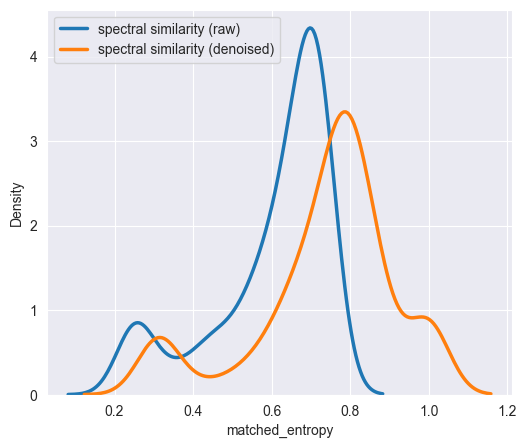

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize = (6, 5))#43
ax = fig.add_subplot()
sns.kdeplot(plot_df['matched_entropy'], label = 'spectral similarity (raw)', linewidth=2.5)
sns.kdeplot(plot_df['entropy_denoised'], label = 'spectral similarity (denoised)', linewidth=2.5)
# sns.kdeplot(diff, label = 'spectral similarity (denoised)', linewidth=2.5)
plt.legend()

In [90]:
from rdkit import Chem

In [91]:
mol =Chem.MolFromSmiles('C[C@H]([C@@H](C(=O)O)N)C(C)O')

In [94]:
from rdkit.Chem.rdMolDescriptors import CalcMolFormula
from rdkit.Chem.AllChem import CalcExactMolWt

In [108]:
from toolsets.std_list_prep import calculate_precursormz

entropy similarity is  0.6969969448409009


<module 'matplotlib.pyplot' from '/opt/homebrew/Caskroom/miniforge/base/envs/alphapept_env/lib/python3.8/site-packages/matplotlib/pyplot.py'>

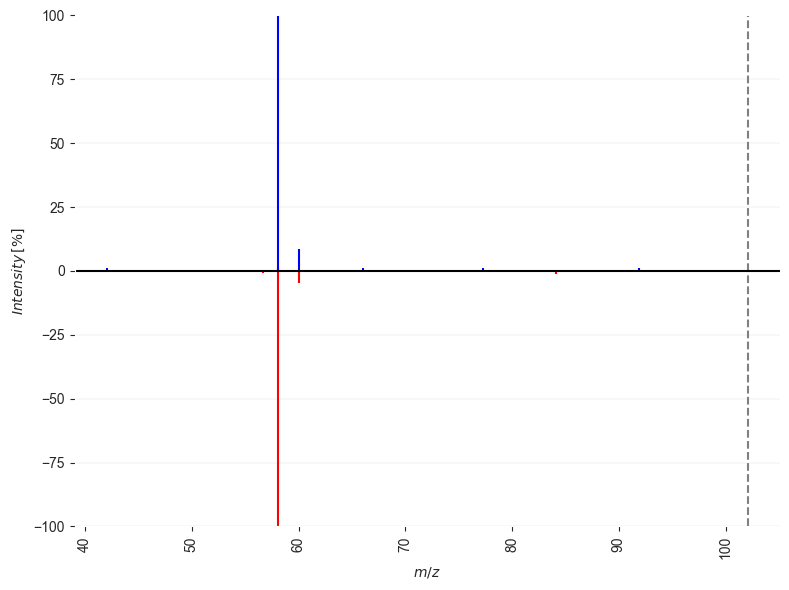

In [89]:
head_to_tail_plot(row['msms'], row['matched_msms'], pmz1=row['precursor_mz'])

In [57]:
row = data_dilution_all_no_matched.iloc[2]

In [61]:
denoised_msms = denoise_h(row['msms'], row['matched_smiles'], row['matched_adduct'], reference_db_sorted)

In [67]:
row['msms']

'54.496341705322266\t2946.439697265625\n55.05428695678711\t5901.505859375\n56.04951477050781\t35652.421875\n57.07000732421875\t11785.515625\n67.05426788330078\t12322.501953125\n69.06996154785156\t10551.3681640625\n73.62518310546875\t2463.9658203125\n84.08090209960938\t2610.4052734375\n91.05455017089844\t4148.90087890625\n95.08560943603516\t6933.5087890625\n109.10137176513672\t14392.822265625\n130.20314025878906\t2778.64892578125\n136.11236572265625\t3559.676513671875\n137.09617614746094\t7604.609375\n153.34393310546875\t2515.533935546875\n154.122802734375\t81629.4765625\n154.137939453125\t4878.5126953125\n157.40863037109375\t2998.3193359375\n171.14947509765625\t35064.21484375\n189.9420623779297\t2735.968017578125\n214.2532196044922\t111656.2578125'

entropy similarity is  0.12253601321593532


<module 'matplotlib.pyplot' from '/opt/homebrew/Caskroom/miniforge/base/envs/alphapept_env/lib/python3.8/site-packages/matplotlib/pyplot.py'>

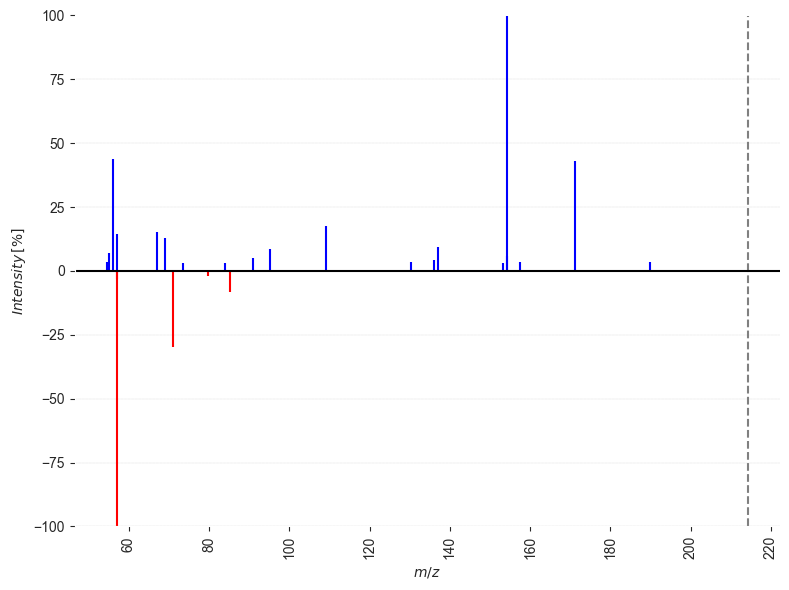

In [70]:
head_to_tail_plot(row['msms'], row['matched_msms'], pmz1=data_dilution_all_no_matched.iloc[2]['precursor_mz'])

entropy similarity is  0.6562855706118926


<module 'matplotlib.pyplot' from '/opt/homebrew/Caskroom/miniforge/base/envs/alphapept_env/lib/python3.8/site-packages/matplotlib/pyplot.py'>

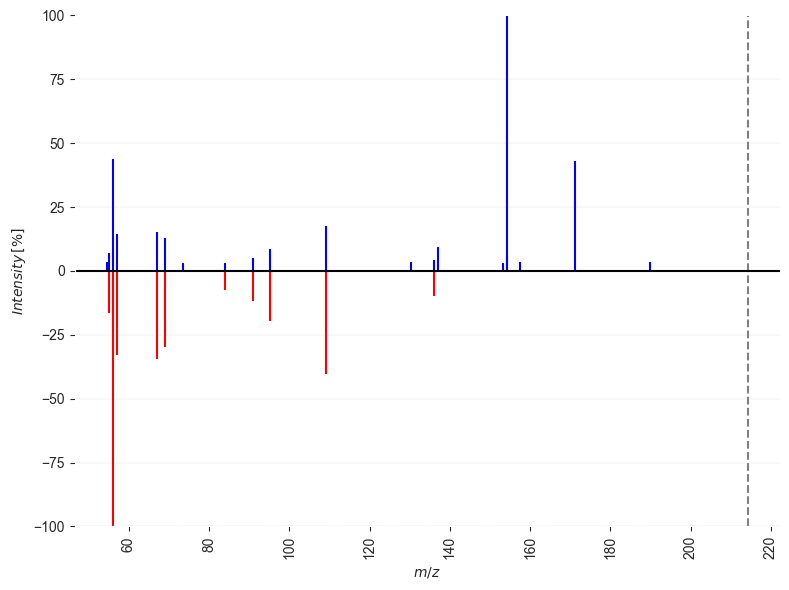

In [68]:
head_to_tail_plot(row['msms'], denoised_msms[0], pmz1=data_dilution_all_no_matched.iloc[2]['precursor_mz'])

In [300]:
istd_all_conc = string_search(data_200, 'compound_type', 'istd')
for c in [100, 50, 20]:
    data_conc = pd.read_csv(os.path.join(pl_dir, 'conc_'+str(c)+'_dereplicated.csv'))
    msms = []
    msms_wa = []
    for index, row in istd_all_conc.iterrows():
        istd_temp = string_search(data_conc, 'annotation',row['annotation'])
        if len(istd_temp)>0:
            msms.append(istd_temp.iloc[0]['msms'])
            msms_wa.append(istd_temp.iloc[0]['msms_wa'])
        else:
            msms.append(np.NAN)
            msms_wa.append(np.NAN)
    istd_all_conc['msms_'+str(c)]=msms
    istd_all_conc['msms_wa_'+str(c)]=msms

In [317]:
entropy_simi = {}
for c in [100,50,20]:
    entropy_simi[c]=[]
    for index, row in istd_all_conc.iterrows():
        entropy_simi[c].append(so.entropy_identity(row['msms'], row['msms_'+str(c)], pmz=row['precursor_mz']))
        # entropy_simi_wa.append(so.entropy_identity(row['msms_wa'], row['msms_wa_'+str(c)], pmz = row['precursor_mz']))

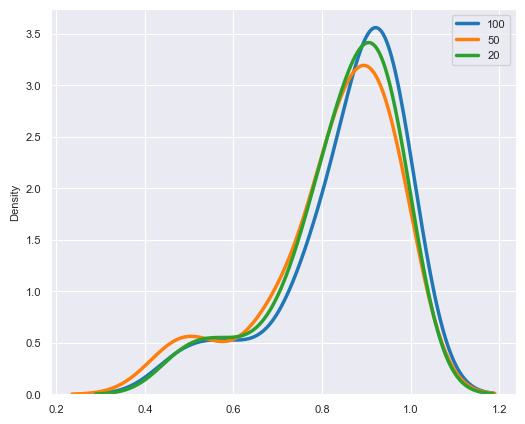

In [318]:
fig = plt.figure(figsize = (6, 5))#43
ax = fig.add_subplot()
for c in [100,50,20]:
    sns.kdeplot(entropy_simi[c], label = c, linewidth=2.5)

plt.legend()

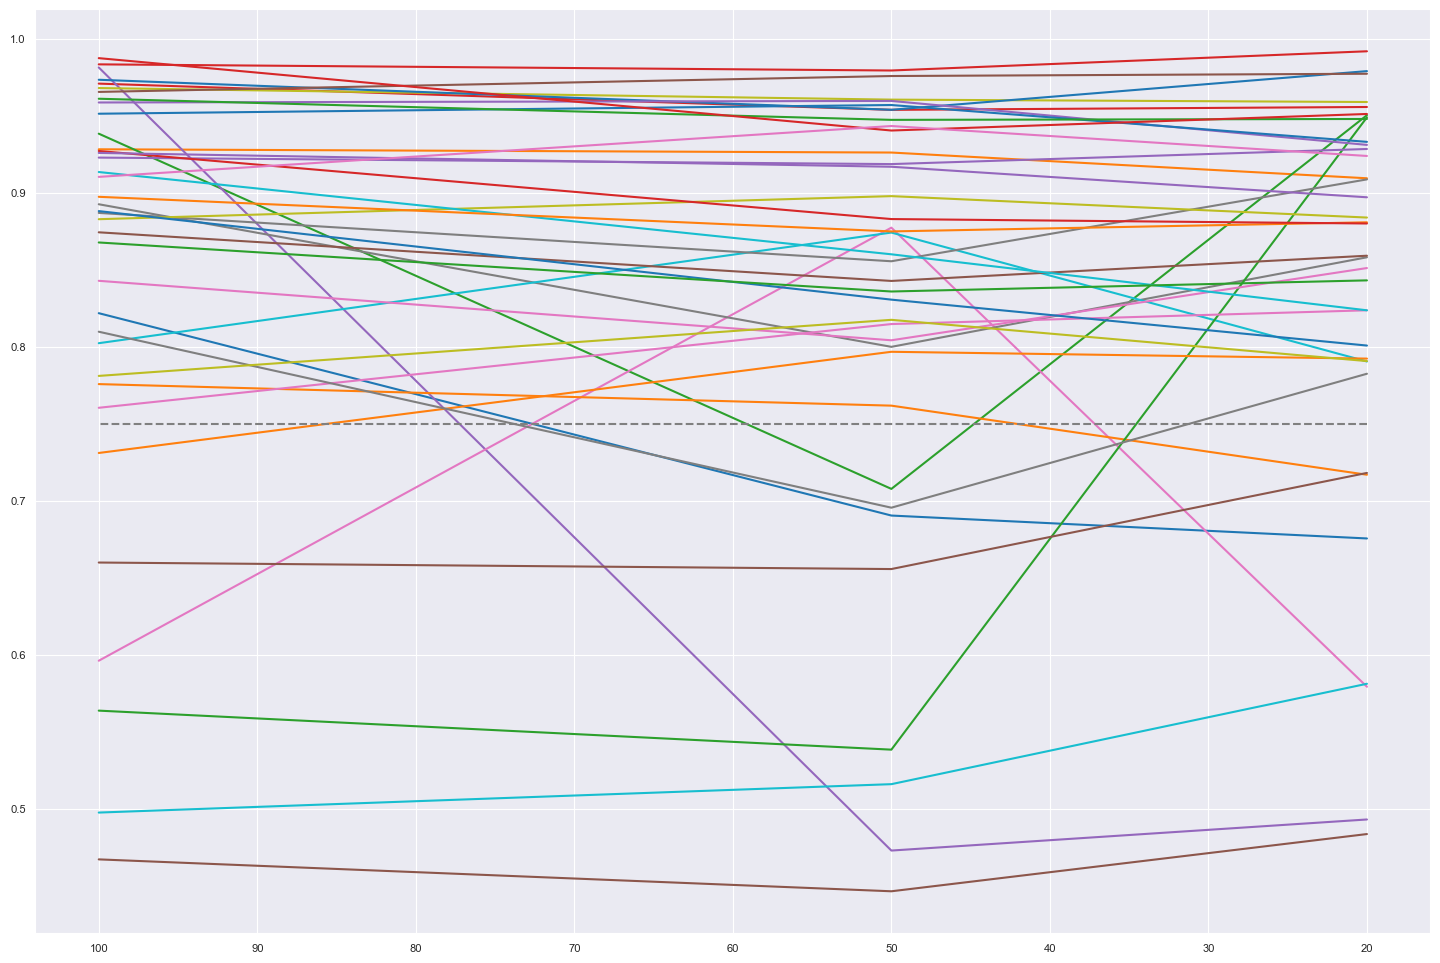

In [340]:
fig = plt.figure(figsize = (18, 12))#43
ax = fig.add_subplot()
for index, row in istd_all_conc.iterrows():
    y_value = []
    for c in [100,50,20]:
        y_value.append(entropy_simi[c][index])
    sns.lineplot(x = [100,50,20], y = y_value,
                    # label = row['annotation'].split('_')[0:-1]
                    )
plt.hlines(y = 0.75, xmin = 20, xmax=100, color = 'grey', linestyle='dashed')
ax.invert_xaxis()
    # break

In [331]:
istd_all_conc

,precursor_mz,rt_apex,compound_type,annotation,ms1_intensity,rt_start,rt_end,iso_state,is_dut,is_halo,...,ms2_scan_idx,mix,occurance,msms_wa,msms_100,msms_wa_100,msms_50,msms_wa_50,msms_20,msms_wa_20
0,180.120895,0.264951,istd,1_D3-Cotinine iSTD [M+H]+,2.783740e+08,0.241470,0.499713,0.0,True,False,...,161,Exposome_Yendry413_MX743739_posBA_1958-200-6,15,41.03865432739258\t1.6750546976908225e-05\n41....,51.16314697265625\t42142.86328125\n72.59600830...,51.16314697265625\t42142.86328125\n72.59600830...,45.05266571044922\t266921.59375\n51.9919166564...,45.05266571044922\t266921.59375\n51.9919166564...,45.05264663696289\t300985.78125\n54.0176811218...,45.05264663696289\t300985.78125\n54.0176811218...
1,236.147050,0.212070,istd,1_D3-N-Acetyl-5-methoxytryptamine iSTD [M+H]+,2.597887e+08,0.169900,0.347092,0.0,True,False,...,119,Exposome_Yendry408_MX743739_posBA_1958-200-1,15,50.62421798706055\t4.852975876743774e-05\n52.1...,51.427791595458984\t68069.25\n63.0632896423339...,51.427791595458984\t68069.25\n63.0632896423339...,51.71023178100586\t49021.52734375\n63.06324768...,51.71023178100586\t49021.52734375\n63.06324768...,61.218746185302734\t188984.015625\n65.10373687...,61.218746185302734\t188984.015625\n65.10373687...
2,127.142701,1.712305,istd,1_D9-Betaine iSTD [M+H]+,4.270593e+07,1.676134,1.839249,0.0,True,False,...,1064,Exposome_Yendry410_MX743739_posBA_1958-200-3,15,40.67948532104492\t0.0004884941852703318\n40.8...,44.93728256225586\t5288.0810546875\n46.0591659...,44.93728256225586\t5288.0810546875\n46.0591659...,53.004005432128906\t2567.220458984375\n66.1154...,53.004005432128906\t2567.220458984375\n66.1154...,44.088623046875\t5718.19384765625\n46.05919265...,44.088623046875\t5718.19384765625\n46.05919265...
3,165.131289,1.876492,istd,1_D3-L-Carnitine iSTD [M+H]+_JXXCENBLGFBQJM-QK...,3.931427e+07,1.843479,2.234097,0.0,True,False,...,1169,Exposome_Yendry410_MX743739_posBA_1958-200-3,15,41.03851318359375\t0.0005020254277252321\n41.2...,41.03857421875\t10772.1533203125\n41.283432006...,41.03857421875\t10772.1533203125\n41.283432006...,41.038536071777344\t8459.1064453125\n41.283405...,41.038536071777344\t8459.1064453125\n41.283405...,41.038509368896484\t8110.16064453125\n43.01784...,41.038509368896484\t8110.16064453125\n43.01784...
4,140.089738,1.418085,istd,1_D3-1-Methylnicotinamide iSTD [M]+,3.891721e+07,1.373018,1.610655,0.0,True,False,...,887,Exposome_Yendry410_MX743739_posBA_1958-200-3,15,42.03371047973633\t0.0005532706678600121\n43.0...,42.03382110595703\t33290.81640625\n45.05282592...,42.03382110595703\t33290.81640625\n45.05282592...,45.052734375\t5562.08251953125\n52.08167648315...,45.052734375\t5562.08251953125\n52.08167648315...,42.6494255065918\t3320.991455078125\n45.052536...,42.6494255065918\t3320.991455078125\n45.052536...
5,207.141816,1.724082,istd,1_D3-ACar(2:0) iSTD [M+H]+,3.653130e+07,1.685338,1.847751,0.0,True,False,...,1073,Exposome_Yendry410_MX743739_posBA_1958-200-3,15,48.06834411621094\t3.9116010914280374e-05\n48....,47.476959228515625\t2346.16455078125\n60.08107...,47.476959228515625\t2346.16455078125\n60.08107...,48.111053466796875\t2515.80859375\n60.08102035...,48.111053466796875\t2515.80859375\n60.08102035...,47.09695816040039\t2666.150634765625\n54.09577...,47.09695816040039\t2666.150634765625\n54.09577...
6,113.163433,1.048714,istd,1_D9-Choline iSTD [M]+_SGMZJAMFUVOLNK-KYRNGWDO...,3.130192e+07,0.983005,1.515072,0.0,True,False,...,644,Exposome_Yendry415_MX743739_posBA_1958-200-8,15,40.14213180541992\t7.203966379401514e-05\n40.5...,42.03386306762695\t67369.5625\n45.031017303466...,42.03386306762695\t67369.5625\n45.031017303466...,42.03382873535156\t11821.9365234375\n44.049571...,42.03382873535156\t11821.9365234375\n44.049571...,42.033897399902344\t124397.2578125\n45.0335311...,42.033897399902344\t124397.2578125\n45.0335311...
7,85.132177,1.191446,istd,1_D9-TMAO iSTD [M+H]+_UYPYRKYUKCHHIB-UHFFFAOYSA-N,2.955737e+07,1.136443,1.501135,0.0,True,False,...,773,Exposome_Yendry408_MX743739_posBA_1958-200-1,15,40.124

In [214]:
annotation_formuala = []
annotation_index = []
annotation_entropy = []
annotation_comment = []
n_formula_matched = []
for index, row in tqdm(data_200.iterrows(), total = len(data_200)):
    if row['compound_type']!='istd':
        pmz_candidate = quick_search_sorted(mega_mona, 'precursor_mz',row['precursor_mz']-0.005, row['precursor_mz']+0.005)
        if len(pmz_candidate)<1:
            annotation_formuala.append([np.NAN])
            annotation_index.append([np.NAN])
            annotation_entropy.append([np.NAN])
            annotation_comment.append('no pmz match')
            n_formula_matched.append(0)
        else:
            spec_simi = []
            for i, r in pmz_candidate.iterrows():
                spec_simi.append(so.entropy_identity(row['msms'], r['msms'],pmz=row['precursor_mz']))
            if np.max(spec_simi)<0.7:
                annotation_formuala.append([np.NAN])
                annotation_index.append([np.NAN])
                annotation_entropy.append([np.NAN])
                annotation_comment.append('no entropy match')
                n_formula_matched.append(0)
            else:
                pmz_candidate['entropy_simi']=spec_simi
                annotation_formuala.append(pmz_candidate[pmz_candidate['entropy_simi']>0.7]['formula'].unique().tolist())
                annotation_index.append(pmz_candidate[pmz_candidate['entropy_simi']>0.7].index.tolist())
                annotation_entropy.append(pmz_candidate[pmz_candidate['entropy_simi']>0.7]['entropy_simi'].tolist())
                annotation_comment.append('matched!')
                n_formula_matched.append(len(pmz_candidate[pmz_candidate['entropy_simi']>0.7]['formula'].unique().tolist()))
    else:
        annotation_formuala.append([np.NAN])
        annotation_index.append([np.NAN])
        annotation_entropy.append([np.NAN])
        annotation_comment.append('it is a istd!')
        n_formula_matched.append(1)
data_200.insert(4, 'annotated_formula', annotation_formuala)
data_200['n_formula_matched']=n_formula_matched
data_200['entropy_simi']=annotation_entropy
data_200['annotation_index']=annotation_index
data_200['annotation_comment']=annotation_comment

100%|██████████| 611/611 [00:55<00:00, 11.05it/s]


In [236]:

data_200_working = data_200.copy()
for c in [100, 50, 20]:
    data_conc_dereplicate=pd.read_csv(os.path.join(pl_dir, 'conc_'+str(c)+'_dereplicated.csv'))
    data_conc_dereplicate.sort_values(by = 'precursor_mz', ascending=True, inplace=True)
    msms_temp = []
    intensity_temp = []
    for index, row in data_200_working.iterrows():
        if row['compound_type']!= 'istd':
            pmz_matched = quick_search_sorted(data_conc_dereplicate, 'precursor_mz', row['precursor_mz']-0.005, row['precursor_mz']+0.005)
            pmz_rt_matched = quick_search_values(pmz_matched, 'rt_apex', row['rt_apex']-1.5/60, row['rt_apex']+1.5/60)
            rt_offset = abs(pmz_rt_matched['rt_apex']-row['rt_apex'])
            if len(pmz_rt_matched)>0:
                msms_temp.append(pmz_rt_matched.iloc[0]['msms'])
                intensity_temp.append(pmz_rt_matched.iloc[0]['ms1_intensity'])
            else:
                msms_temp.append(np.NAN)
                intensity_temp.append(np.NAN)
        else:
            pmz_rt_matched = string_search(data_conc_dereplicate, 'annotation', row['annotation'])
            if len(pmz_rt_matched)>0:
                msms_temp.append(pmz_rt_matched.iloc[0]['msms'])
                intensity_temp.append(pmz_rt_matched.iloc[0]['ms1_intensity'])
            else:
                msms_temp.append(np.NAN)
                intensity_temp.append(np.NAN)
    data_200_working[str(c)+'_msms']=msms_temp
    data_200_working[str(c)+'_intensity']=intensity_temp
# data_matched = string_search(data_200_working, 'annotation_comment', 'matched!')

# data_matched_unique = string_search(data_matched, 'n_formula_matched', 1)

In [237]:
istd_all_conc = string_search(data_200_working, 'compound_type', 'istd')

In [238]:
istd_all_conc

,precursor_mz,rt_apex,compound_type,annotation,annotated_formula,ms1_intensity,rt_start,rt_end,iso_state,is_dut,...,n_formula_matched,entropy_simi,annotation_index,annotation_comment,100_msms,100_intensity,50_msms,50_intensity,20_msms,20_intensity
0,180.120895,0.264951,istd,1_D3-Cotinine iSTD [M+H]+,[nan],2.783740e+08,0.241470,0.499713,0.0,True,...,1,[nan],[nan],it is a istd!,51.16314697265625\t42142.86328125\n72.59600830...,2.917415e+08,45.05266571044922\t266921.59375\n51.9919166564...,3.005875e+08,45.05264663696289\t300985.78125\n54.0176811218...,2.779268e+08
1,236.147050,0.212070,istd,1_D3-N-Acetyl-5-methoxytryptamine iSTD [M+H]+,[nan],2.597887e+08,0.169900,0.347092,0.0,True,...,1,[nan],[nan],it is a istd!,51.427791595458984\t68069.25\n63.0632896423339...,2.754446e+08,51.71023178100586\t49021.52734375\n63.06324768...,2.813114e+08,61.218746185302734\t188984.015625\n65.10373687...,2.577125e+08
2,127.142701,1.712305,istd,1_D9-Betaine iSTD [M+H]+,[nan],4.270593e+07,1.676134,1.839249,0.0,True,...,1,[nan],[nan],it is a istd!,44.93728256225586\t5288.0810546875\n46.0591659...,4.486505e+07,53.004005432128906\t2567.220458984375\n66.1154...,4.476665e+07,44.088623046875\t5718.19384765625\n46.05919265...,4.808687e+07
3,165.131289,1.876492,istd,1_D3-L-Carnitine iSTD [M+H]+_JXXCENBLGFBQJM-QK...,[nan],3.931427e+07,1.843479,2.234097,0.0,True,...,1,[nan],[nan],it is a istd!,41.03857421875\t10772.1533203125\n41.283432006...,4.004369e+07,41.038536071777344\t8459.1064453125\n41.283405...,3.886023e+07,41.038509368896484\t8110.16064453125\n43.01784...,3.974775e+07
4,140.089738,1.418085,istd,1_D3-1-Methylnicotinamide iSTD [M]+,[nan],3.891721e+07,1.373018,1.610655,0.0,True,...,1,[nan],[nan],it is a istd!,42.03382110595703\t33290.81640625\n45.05282592...,3.847388e+07,45.052734375\t5562.08251953125\n52.08167648315...,3.661846e+07,42.6494255065918\t3320.991455078125\n45.052536...,3.476146e+07
5,207.141816,1.724082,istd,1_D3-ACar(2:0) iSTD [M+H]+,[nan],3.653130e+07,1.685338,1.847751,0.0,True,...,1,[nan],[nan],it is a istd!,47.476959228515625\t2346.16455078125\n60.08107...,3.722231e+07,48.111053466796875\t2515.80859375\n60.08102035...,3.694247e+07,47.09695816040039\t2666.150634765625\n54.09577...,3.550826e+07
6,113.163433,1.048714,istd,1_D9-Choline iSTD [M]+_SGMZJAMFUVOLNK-KYRNGWDO...,[nan],3.130192e+07,0.983005,1.515072,0.0,True,...,1,[nan],[nan],it is a istd!,42.03386306762695\t67369.5625\n45.031017303466...,3.276265e+07,42.03382873535156\t11821.9365234375\n44.049571...,3.417974e+07,42.033897399902344\t124397.2578125\n45.0335311...,3.308037e+07
7,85.132177,1.191446,istd,1_D9-TMAO iSTD [M+H]+_UYPYRKYUKCHHIB-UHFFFAOYSA-N,[nan],2.955737e+07,1.136443,1.501135,0.0,True,...,1,[nan],[nan],it is a istd!,46.05915069580078\t6091.5205078125\n66.1062393...,3.055791e+07,45.51387023925781\t4853.96630859375\n48.339504...,3.000092e+07,46.62997055053711\t3800.406982421875\n55.53897...,2.917079e+07
8,135.095520,1.953336,istd,1_D3-Creatine iSTD [M+H]+_ MEJYXFHCRXAUIL-NIID...,[nan],2.205842e+07,1.919793,2.068328,0.0,True,...,1,[nan],[nan],it is a istd!,40.60267639160156\t5282.23193359375\n43.029094...,2.162513e+07,41.58917236328125\t5779.4833984375\n43.0227432...,1.947067e+07,40.072784423828125\t6675.0234375\n43.029067993...,2.124613e+07
9,117.084998,0.892713,istd,1_D3-Creatinine iSTD [M+H]+_DDRJAANPRJIHGJ-FIB...,[nan],1.263932e+07,0.815667,1.191277,0.0,True,...,1,[nan],[nan],it is a istd!,40.70058059692383\t4005.13916015625\n41.481925...,1.340479e+07,43.029266357421875\t16010.693359375\n47.058208...,1.487816e+07,41.51445770263672\t4989.3779296875\n41.7271575...,1.475345e+07


In [250]:
row = istd_all_conc.iloc[6]
so.entropy_identity(row['msms'], row['100_msms'], pmz = row['precursor_mz'])

0.5960126213525516

In [251]:
from toolsets.spectra_plotter import head_to_tail_plot

In [268]:
so.see_msms(row['msms'])

array([[4.05377312e+01, 2.54003003e+03],
       [4.20338898e+01, 8.06265967e+03],
       [4.40494728e+01, 4.28622773e+04],
       [4.50334473e+01, 2.80738340e+04],
       [4.60368271e+01, 2.85446719e+04],
       [5.10951157e+01, 2.87594751e+03],
       [6.51062698e+01, 3.11133789e+03],
       [6.61155243e+01, 7.25356396e+03],
       [6.71190186e+01, 7.65206152e+03],
       [6.81296768e+01, 6.30448047e+03],
       [6.91329575e+01, 5.90489111e+03],
       [6.91372757e+01, 1.11895938e+05],
       [7.01345749e+01, 1.69114805e+04],
       [7.01407852e+01, 9.96735859e+04],
       [8.48451309e+01, 3.06588696e+03],
       [8.60712509e+01, 3.13339014e+03],
       [1.08535576e+02, 3.95666406e+03],
       [1.13163902e+02, 3.05035059e+03],
       [1.14066132e+02, 6.87558516e+04],
       [1.14091736e+02, 6.03440967e+03],
       [1.14145531e+02, 9.98984961e+03],
       [1.14167076e+02, 9.71738938e+05],
       [1.14194618e+02, 4.83645068e+03]])

entropy similarity is  0.5791204312621507


<module 'matplotlib.pyplot' from '/opt/homebrew/Caskroom/miniforge/base/envs/alphapept_env/lib/python3.8/site-packages/matplotlib/pyplot.py'>

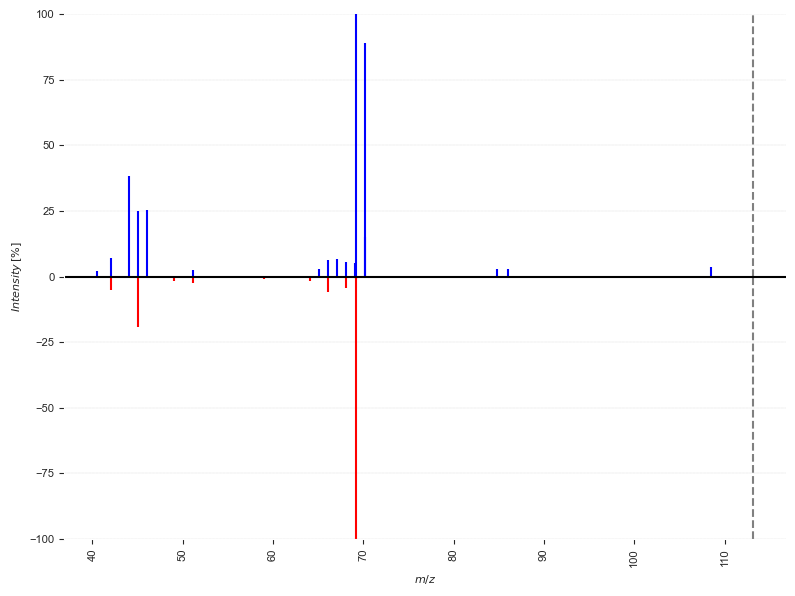

In [285]:
head_to_tail_plot(row['msms'], row['20_msms'], pmz1 = row['precursor_mz'])

In [135]:
istds = string_search(data_200_working, 'compound_type', 'istd')

In [154]:
rt_offset = abs(pmz_rt_matched['rt_apex']-row['rt_apex'])

In [156]:
pmz_rt_matched

,precursor_mz,rt_apex,compound_type,annotation,ms1_intensity,rt_start,rt_end,iso_state,is_dut,is_halo,rt_offset,mz_offset,reci_snr,peak_purity,msms,ms1_scan_range,ms2_scan_idx_range_list,ms2_scan_idx,mix,occurance
300,60.05566,1.458232,compound,unknown,404301.197788,1.228412,1.612677,0.0,False,False,0.001175,0.000004,0.12394,0.489038,41.541282653808594\t2898.385009765625\n42.0338...,"[257, 302, 332]",[897],897,Exposome_Yendry402_MX743739_posBA_1958-100-10,15


In [155]:
rt_offset

300    0.132137
Name: rt_apex, dtype: float64

In [144]:
list_100 = [x for x in file_list if str(100) in x]

In [145]:
data_conc_dereplicate=pd.read_csv(os.path.join(pl_dir, 'conc_'+str(100)+'_dereplicated.csv'))

In [147]:
data_conc_dereplicate[data_conc_dereplicate['compound_type']=='istd']

,precursor_mz,rt_apex,compound_type,annotation,ms1_intensity,rt_start,rt_end,iso_state,is_dut,is_halo,rt_offset,mz_offset,reci_snr,peak_purity,msms,ms1_scan_range,ms2_scan_idx_range_list,ms2_scan_idx,mix,occurance
0,180.120988,0.264502,istd,1_D3-Cotinine iSTD [M+H]+,2.917415e+08,0.241348,0.729134,0.0,True,False,0.002145,1.998596e-04,2.559208e-04,0.965512,51.16314697265625\t42142.86328125\n72.59600830...,"[50, 55, 152]","[197, 438, 341, 158, 305, 272, 233, 378]",158,Exposome_Yendry405_MX743739_posBA_1958-100-13,15
1,236.147036,0.210190,istd,1_D3-N-Acetyl-5-methoxytryptamine iSTD [M+H]+,2.754446e+08,0.153379,0.389999,0.0,True,False,0.003676,3.009487e-04,1.455978e-04,0.964379,51.427791595458984\t68069.25\n63.0632896423339...,"[30, 44, 85]","[163, 202, 118, 124]",118,Exposome_Yendry402_MX743739_posBA_1958-100-10,15
6,127.142685,1.708974,istd,1_D9-Betaine iSTD [M+H]+,4.486505e+07,1.668430,1.843155,0.0,True,False,0.009263,7.573476e-05,1.602723e-04,0.968800,44.93728256225586\t5288.0810546875\n46.0591659...,"[337, 346, 374]","[1022, 1061]",1022,Exposome_Yendry395_MX743739_posBA_1958-100-3,15
7,165.131290,1.878180,istd,1_D3-L-Carnitine iSTD [M+H]+_JXXCENBLGFBQJM-QK...,4.004369e+07,1.845124,2.254905,0.0,True,False,0.013850,4.774222e-05,1.390719e-04,0.971172,41.03857421875\t10772.1533203125\n41.283432006...,"[377, 385, 458]","[1134, 1206, 1173]",1134,Exposome_Yendry405_MX743739_posBA_1958-100-13,15
11,140.089677,1.415257,istd,1_D3-1-Methylnicotinamide iSTD [M]+,3.847388e+07,1.372342,1.546763,0.0,True,False,0.007856,1.450529e-04,5.900446e-06,0.961565,42.03382110595703\t33290.81640625\n45.05282592...,"[280, 288, 314]","[851, 887]",851,Exposome_Yendry395_MX743739_posBA_1958-100-3,15
14,207.141735,1.724551,istd,1_D3-ACar(2:0) iSTD [M+H]+,3.722231e+07,1.677163,1.850054,0.0,True,False,0.008308,7.430067e-05,9.436180e-06,0.968255,47.476959228515625\t2346.16455078125\n60.08107...,"[343, 354, 380]","[1039, 1054]",1054,Exposome_Yendry398_MX743739_posBA_1958-100-6,15
17,113.163457,1.044701,istd,1_D9-Choline iSTD [M]+_SGMZJAMFUVOLNK-KYRNGWDO...,3.276265e+07,0.980456,1.366778,0.0,True,False,0.027582,1.563619e-05,2.245569e-04,0.983383,42.03386306762695\t67369.5625\n45.031017303466...,"[201, 215, 279]","[656, 689, 617]",656,Exposome_Yendry395_MX743739_posBA_1958-100-3,15
18,85.132166,1.187371,istd,1_D9-TMAO iSTD [M+H]+_UYPYRKYUKCHHIB-UHFFFAOYSA-N,3.055791e+07,1.133303,1.608292,0.0,True,False,0.018950,3.594725e-05,2.210653e-04,0.962451,46.05915069580078\t6091.5205078125\n66.1062393...,"[233, 244, 325]","[776, 710, 746]",710,Exposome_Yendry396_MX743739_posBA_1958-100-4,15
22,135.095505,1.957911,istd,1_D3-Creatine iSTD [M+H]+_ MEJYXFHCRXAUIL-NIID...,2.162513e+07,1.923095,2.081089,0.0,True,False,0.005830,1.365142e-04,5.391194e-06,0.952565,40.60267639160156\t5282.23193359375\n43.029094...,"[391, 398, 422]","[1180, 1216]",1180,Exposome_Yendry396_MX743739_posBA_1958-100-4,15
29,117.084995,0.890266,istd,1_D3-Creatinine iSTD [M+H]+_DDRJAANPRJIHGJ-FIB...,1.340479e+07,0.828255,1.219667,0.0,True,False,0.029712,7.849264e-06,8.421085e-04,0.973742,40.70058059692383\t4005.13916015625\n41.481925...,"[171, 184, 252]","[562, 595, 526]",562,Exposome_Yendry399_MX743739_posBA_1958-100-7,15


In [48]:
data_conc_dereplicate=pd.read_csv(os.path.join(pl_dir, 'conc_'+str(c)+'_dereplicated.csv'))
data_conc_dereplicate.sort_values(by = 'precursor_mz', ascending=True, inplace=True)
msms_temp = []
intensity_temp = []
# for index, row in data_200_working.iterrows():
#     pmz_matched = quick_search_sorted(data_conc_dereplicate, 'precursor_mz', row['precursor_mz']-0.005, row['precursor_mz']+0.005)
#     pmz_rt_matched = quick_search_values(pmz_matched, 'rt_apex', row['rt_apex']-5/60, row['rt_apex']+5/60)
#     if len(pmz_rt_matched)==1:
#         msms_temp.append(pmz_rt_matched.iloc[0]['msms'])
#         intensity_temp.append(pmz_rt_matched.iloc[0]['ms1_intensity'])
#     else:
#         msms_temp.append(np.NAN)
#         intensity_temp.append(np.NAN)
# data_200_working[str(c)+'_msms']=msms_temp
# data_200_working[str(c)+'intensity_temp']=msms_temp

In [52]:
pmz_matched = quick_search_sorted(data_conc_dereplicate, 'precursor_mz', 85.132177-0.005, 85.132177+0.005)

In [53]:
pmz_matched

,precursor_mz,rt_apex,compound_type,annotation,ms1_intensity,rt_start,rt_end,iso_state,is_dut,is_halo,rt_offset,mz_offset,reci_snr,peak_purity,msms,ms1_scan_range,ms2_scan_idx_range_list,ms2_scan_idx,mix,occurance
18,85.132166,1.187371,istd,1_D9-TMAO iSTD [M+H]+_UYPYRKYUKCHHIB-UHFFFAOYSA-N,3.055791e+07,1.133303,1.608292,0.0,True,False,0.01895,0.000036,0.000221,0.962451,46.05915069580078\t6091.5205078125\n66.1062393...,"[233, 244, 325]","[776, 710, 746]",710,Exposome_Yendry396_MX743739_posBA_1958-100-4,15


In [51]:
string_search(data_200_working, 'compound_type', 'istd')

,precursor_mz,rt_apex,compound_type,annotation,annotated_formula,ms1_intensity,rt_start,rt_end,iso_state,is_dut,...,occurance,entropy_simi,annotation_index,annotation_comment,100_msms,100intensity_temp,50_msms,50intensity_temp,20_msms,20intensity_temp
0,85.132177,1.191446,istd,1_D9-TMAO iSTD [M+H]+_UYPYRKYUKCHHIB-UHFFFAOYSA-N,[nan],2.955737e+07,1.136443,1.501135,0.0,True,...,15,[nan],[nan],it is a istd!,NaN,NaN,NaN,NaN,NaN,NaN
1,94.080064,1.956117,istd,1_D4-Alanine iSTD [M+H]+_QNAYBMKLOCPYGJ-IALWII...,[nan],2.530526e+06,1.904577,2.508506,0.0,True,...,15,[nan],[nan],it is a istd!,NaN,NaN,NaN,NaN,NaN,NaN
2,109.068680,2.105564,istd,1_D3-Serine iSTD [M+H]+_ MTCFGRXMJLQNBG-FUDHJZ...,[nan],3.649917e+05,2.074652,2.241995,0.0,False,...,14,[nan],[nan],it is a istd!,NaN,NaN,NaN,NaN,NaN,NaN
3,113.163433,1.048714,istd,1_D9-Choline iSTD [M]+_SGMZJAMFUVOLNK-KYRNGWDO...,[nan],3.130192e+07,0.983005,1.515072,0.0,True,...,15,[nan],[nan],it is a istd!,NaN,NaN,NaN,NaN,NaN,NaN
4,117.084998,0.892713,istd,1_D3-Creatinine iSTD [M+H]+_DDRJAANPRJIHGJ-FIB...,[nan],1.263932e+07,0.815667,1.191277,0.0,True,...,15,[nan],[nan],it is a istd!,NaN,NaN,NaN,NaN,NaN,NaN
5,123.114549,1.873416,istd,1_D7-Proline iSTD [M+H]+,[nan],9.507674e+06,1.838733,2.218517,0.0,True,...,15,[nan],[nan],it is a istd!,NaN,NaN,NaN,NaN,NaN,NaN
6,125.096931,1.996845,istd,1_D5-Threonine iSTD [M+H]+_ AYFVYJQAPQTCCC-WKH...,[nan],5.508144e+05,1.962177,2.224144,2.0,False,...,4,[nan],[nan],it is a istd!,NaN,NaN,NaN,NaN,NaN,NaN
7,126.136479,1.879392,istd,1_D8-Valine iSTD [M+H]+_KZSNJWFQEVHDMF-AYWPRJO...,[nan],3.476994e+06,1.852484,2.324326,0.0,True,...,15,[nan],[nan],it is a istd!,NaN,NaN,NaN,NaN,NaN,NaN
8,127.142701,1.712305,istd,1_D9-Betaine iSTD [M+H]+,[nan],4.270593e+07,1.676134,1.839249,0.0,True,...,15,[nan],[nan],it is a istd!,NaN,NaN,NaN,NaN,NaN,NaN
9,128.064445,0.988305,istd,1_D4-Niacin iSTD [M+H]+,[nan],7.739096e+05,0.910884,1.173041,0.0,True,...,15,[nan],[nan],it is a istd!,NaN,NaN,NaN,NaN,NaN,NaN


In [475]:
# for c in [200,100,50,20]:
#     data_conc_dereplicate=pd.read_csv(os.path.join(pl_dir, 'conc_'+str(c)+'_dereplicated.csv'))
#     data_conc_annoatated = data_conc_dereplicate.copy()
#     annotation_formuala = []
#     annotation_index = []
#     annotation_entropy = []
#     annotation_comment = []
#     for index, row in tqdm(data_conc_dereplicate.iterrows(), total = len(data_conc_dereplicate)):
#         if row['compound_type']!='istd':
#             pmz_candidate = quick_search_sorted(mega_mona, 'precursor_mz',row['precursor_mz']-0.005, row['precursor_mz']+0.005)
#             if len(pmz_candidate)<1:
#                 annotation_formuala.append([np.NAN])
#                 annotation_index.append([np.NAN])
#                 annotation_entropy.append([np.NAN])
#                 annotation_comment.append('no pmz match')
#             else:
#                 spec_simi = []
#                 for i, r in pmz_candidate.iterrows():
#                     spec_simi.append(so.entropy_identity(row['msms'], r['msms'],pmz=row['precursor_mz']))
#                 if np.max(spec_simi)<0.7:
#                     annotation_formuala.append([np.NAN])
#                     annotation_index.append([np.NAN])
#                     annotation_entropy.append([np.NAN])
#                     annotation_comment.append('no entropy match')
#                 else:
#                     pmz_candidate['entropy_simi']=spec_simi
#                     annotation_formuala.append(pmz_candidate[pmz_candidate['entropy_simi']>0.7]['formula'].unique().tolist())
#                     annotation_index.append(pmz_candidate[pmz_candidate['entropy_simi']>0.7].index.tolist())
#                     annotation_entropy.append(pmz_candidate[pmz_candidate['entropy_simi']>0.7]['entropy_simi'].tolist())
#                     annotation_comment.append('matched!')
#         else:
#             annotation_formuala.append([np.NAN])
#             annotation_index.append([np.NAN])
#             annotation_entropy.append([np.NAN])
#             annotation_comment.append('it is a istd!')
#     data_conc_annoatated.insert(4, 'annotated_formula', annotation_formuala)
#     data_conc_annoatated['entropy_simi']=annotation_entropy
#     data_conc_annoatated['annotation_index']=annotation_index
#     data_conc_annoatated['annotation_comment']=annotation_comment
    # data_conc_annoatated.to_csv(os.path.join(pl_dir, 'conc_'+str(c)+'_annotated.csv'), index = False)

100%|██████████| 564/564 [00:52<00:00, 10.79it/s]


In [3]:
data_annotated = {}
for c in [200,100,50,20]:
    data_annotated[str(c)]=pd.read_csv(os.path.join(pl_dir, 'conc_'+str(c)+'_annotated.csv'))

In [6]:
data_annotated['200']

,precursor_mz,rt_apex,compound_type,annotation,annotated_formula,ms1_intensity,rt_start,rt_end,iso_state,is_dut,...,peak_purity,msms,ms1_scan_range,ms2_scan_idx_range_list,ms2_scan_idx,mix,occurance,entropy_simi,annotation_index,annotation_comment
0,180.120895,0.264951,istd,1_D3-Cotinine iSTD [M+H]+,[nan],2.783740e+08,0.241470,0.499713,0.0,True,...,0.960884,41.07022476196289\t30258.318359375\n42.8030776...,"[51, 56, 110]","[203, 159, 161, 317, 281, 242]",161,Exposome_Yendry413_MX743739_posBA_1958-200-6,15,[nan],[nan],it is a istd!
1,236.147050,0.212070,istd,1_D3-N-Acetyl-5-methoxytryptamine iSTD [M+H]+,[nan],2.597887e+08,0.169900,0.347092,0.0,True,...,0.966842,50.62421798706055\t139264.03125\n54.4682998657...,"[33, 43, 75]","[200, 119, 158]",119,Exposome_Yendry408_MX743739_posBA_1958-200-1,15,[nan],[nan],it is a istd!
2,430.389282,0.366260,compound,unknown,[nan],2.366647e+08,0.326510,0.521155,0.0,False,...,1.000000,55.05428695678711\t5325.82666015625\n57.069896...,"[72, 81, 115]",[279],279,Exposome_Yendry409_MX743739_posBA_1958-200-2,15,[nan],[nan],no pmz match
3,182.190155,0.413028,compound,unknown,['C12H23N'],1.348685e+08,0.369197,0.437463,0.0,False,...,0.960828,42.03388977050781\t44768.5078125\n45.548145294...,"[80, 90, 96]",[257],257,Exposome_Yendry408_MX743739_posBA_1958-200-1,15,"[0.7197113308378632, 0.8954659599402887, 0.769...","[216204, 216201, 216207, 216203, 216202, 21619...",matched!
4,402.357880,0.375228,compound,unknown,[nan],7.380452e+07,0.335217,0.395636,0.0,False,...,0.981811,55.05419158935547\t830779.875\n57.033458709716...,"[74, 83, 88]",[236],236,Exposome_Yendry409_MX743739_posBA_1958-200-2,15,[nan],[nan],no pmz match
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,183.988876,2.333898,compound,unknown,[nan],1.218968e+04,2.272188,2.514784,1.0,False,...,0.379225,59.930419921875\t3531.53271484375\n60.93819808...,"[470, 481, 515]",[1481],1481,Exposome_Yendry416_MX743739_posBA_1958-200-9,1,[nan],[nan],no entropy match
560,275.102234,1.766042,compound,unknown,[nan],7.794644e+03,1.746124,1.786941,-1.0,True,...,0.165818,58.06527328491211\t6737.095703125\n61.09343338...,"[363, 367, 371]",[1097],1097,Exposome_Yendry418_MX743739_posBA_1958-200-11,3,[nan],[nan],no entropy match
561,191.153946,1.349826,compound,unknown,[nan],6.255897e+03,1.335314,1.383122,NaN,True,...,0.490947,61.82646179199219\t2749.17138671875\n98.096466...,"[284, 287, 293]",[861],861,Exposome_Yendry414_MX743739_posBA_1958-200-7,1,[nan],[nan],no entropy match
562,125.130142,0.632498,compound,unknown,[nan],4.203905e+03,0.580635,0.660319,NaN,True,...,0.078461,57.733890533447266\t2576.056640625\n59.9197425...,"[127, 137, 143]",[405],405,Exposome_Yendry408_MX743739_posBA_1958-200-1,1,[nan],[nan],no entropy match


# lets take a look of certified materials

In [507]:
certified_compounds = pd.read_csv(os.path.join(master_dir, 'certified_compounds.csv'))

In [508]:
certified_compounds

,name,Cat
0,"2,2',4-Tribromodiphenyl ether",PBDE
1,"2,4,4'-Tribromodiphenyl ether",PBDE
2,"2,2',4,4'-Tetrabromodiphenyl ether",PBDE
3,"2,3',4,4'-Tetrabromodiphenyl ether",PBDE
4,"2,2',3,4,4'-Pentabromodiphenyl ether",PBDE
...,...,...
57,"2,2',3,3',4,4',5,6'-Octachlorobiphenyl",PCB
58,"2,2',3,3',4,5,5',6'-Octachlorobiphenyl",PCB
59,"2,2',3,4,4',5,5',6-Octachlorobiphenyl",PCB
60,"2,2',3,3',4,4',5,5',6-Nonachlorobiphenyl",PCB


In [500]:
from pubchempy import Compound, get_compounds

In [509]:
smiles = []
for index, row in tqdm(certified_compounds.iterrows(), total = len(certified_compounds)):
    cc = get_compounds(row['name'], 'name')
    if len(cc)>0:
        smiles.append(cc[0].isomeric_smiles)
    else:
        smiles.append(np.NAN)
certified_compounds['smiles_fetched']=smiles
certified_compounds.dropna(subset=['smiles_fetched'], inplace=True)

100%|██████████| 62/62 [00:30<00:00,  2.06it/s]


In [511]:
from toolsets.std_list_prep import complete_adducts

In [512]:
certified_compounds = complete_adducts(certified_compounds, smile_column='smiles_fetched', adducts= ['[M+H]+', '[M+Na]+','[M+NH4]+', '[M+K]+'])

In [515]:
eic_dir

'/Users/fanzhoukong/Documents/GitHub/Libgen_data/srm_1958/EIC'

In [516]:
file_list_conc = []
c = 200
for f in file_list:
    base_name, conc, repl = f.split('-')
    if str(c)==conc:
        file_list_conc.append(f)

In [531]:
f

'Exposome_Yendry415_MX743739_posBA_1958-200-8'

In [518]:
# ms1, ms2 = rds.read_mzml(f+'.mzML', parent_dir=mzml_dir)
# mass_sorted, intensity_sorted, index_sorted, rt_list = ff.build_index(ms1)

In [535]:
md_pl = readin_peak_list(os.path.join(msdial_pl_dir, f+'.txt'))

In [562]:
pmz = 655.57006
quick_search_values(md_pl, 'Precursor m/z', pmz-0.005, pmz+0.005)

,PeakID,Title,Scans,RT left(min),RT (min),RT right (min),Precursor m/z,Height,Area,Model masses,...,m/z matched,MS/MS matched,RT similarity,Dot product,Reverse dot product,Fragment presence %,Total score,S/N,MS1 isotopes,MSMS spectrum
2602,2602,Unknown,160,0.214319,0.266717,0.319473,655.5699,23209.673828,27064.476562,NaN,...,False,False,NaN,NaN,NaN,NaN,NaN,464.1935,655.56989:79998,NaN


In [563]:
713.067139-3*iso_steps['Cl']

707.076019